## Analysing US airlines 2010-2019 ticket price data 

In this section, we analyse the ticket price data  of domestic flights in the USA between 2010 and 2019.  
Our aim is to investigate whether airline ticket prices have a correlation, or any relationship to their CO2 emissions.  
We used the open data from the U.S. Department of Tranportation's website:  
https://data.transportation.gov/Aviation/Consumer-Airfare-Report-Table-6-Contiguous-State-C/yj5y-b2ir


### Columns in this Dataset
    
|___Column Name___ |___Description___ |___Type___ |
|:------------|:--------------|:-------------|
|tbl |Name of the data table |Plain Text|
|Year | Year | Number|
|quarter | Quarter | Number|
| citymarketid_1 | Identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market | Number|
|citymarketid_2	|Identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market|Number|
|city1|City1 is used to consolidate airports serving the same city market|Plain Text
|city2	|City2 is used to consolidate airports serving the same city market|Plain Text
|nsmiles|Non-Stop market miles (using radian measure)|Number
|passengers	|Passenger per day|Number
|fare | Overall average fare |Number
|carrier_lg	|Carrier with the largest market share |Plain Text
|large_ms|Market share for the carrier with the largest market share|Number
|fare_lg|Average fare for the carrier with the largest market share|Number
|carrier_low|Carrier with the lowest fare|Plain Text
|lf_ms	|Market share for the carrier with the lowest fare|Number
|fare_low|Average fare for the carrier with the lowest fare|Number
|table_1_flag|Flag for Table 1 subset. Top 1,000 Contiguous State City Pair Markets.|Number
|location_1| Geocoded City1 is used to consolidate airports serving the same city market with Latitude and Longitude| Point|
|location_1_city|Geocoded_City1 (city)|Plain Text
|location_2|Geocoded - City2 is used to consolidate airports serving the same city market with Latitude and Longitude|Point
location_2_city|Geocoded_City2 (city)|Plain Text
|tbl6pk	|Primary Key for Table 6, unique id|Number

### Airline codes
|___IATA Code___|___Airline Name___|
|:-------------|:-----------------|
|AA|American Airlines|
|AS|Alaska Airlines|
|B6|JetBlue Airways|
|CO|North-Western Cargo International Airlines|
|DL|Delta Air Lines|
|F9|Frontier Airlines|
|FL|Air Large European Aviation Project Air Leap|
|G4|Allegiant Air| 
|NK|Spirit Airlines|
|UA|United Airlines|
|WN|Southwest Airlines|

#### Loading data from API

In [143]:
# import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
# The sodapy libary needs to be installed for the API request

# pip install sodapy

In [145]:
# Making an API request, using sodapy package to access the 2010-2019 data

from sodapy import Socrata

client = Socrata("data.transportation.gov", None)

results = client.get("yj5y-b2ir", where='year > 2009 and year < 2020', limit = 600000)


#### Cleaning and transforming data

In [146]:
fare_full_df = pd.DataFrame.from_records(results)

In [147]:
fare_full_df.shape

(227497, 22)

In [148]:
fare_full_df.head()

,tbl,year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,...,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,location_1,location_1_city,location_2,location_2_city,tbl6pk
0,Table 6,2010,3,32211,33158,"Las Vegas, NV","Midland/Odessa, TX",796,130.54,193.53,...,191.79,WN,0.94,191.79,0,"{'type': 'Point', 'coordinates': [-115.140597,...","Las Vegas, NV","{'type': 'Point', 'coordinates': [-102.078043,...","Midland/Odessa, TX",201033221133158
1,Table 6,2010,1,32575,33244,"Los Angeles, CA (Metropolitan Area)","Memphis, TN",1619,340.11,246.9,...,292.8,US,0.21,195.44,1,"{'type': 'Point', 'coordinates': [-118.243344,...","Los Angeles, CA (Metropolitan Area)","{'type': 'Point', 'coordinates': [-90.052136, ...","Memphis, TN",201013257533244
2,Table 6,2010,2,31453,35380,"Houston, TX","Traverse City, MI",1168,10.87,396.9,...,344.58,UA,0.22,334.9,0,"{'type': 'Point', 'coordinates': [-95.369506, ...","Houston, TX","{'type': 'Point', 'coordinates': [-85.605469, ...","Traverse City, MI",201023145335380
3,Table 6,2010,1,30194,35380,"Dallas/Fort Worth, TX","Traverse City, MI",1022,10.66,257.27,...,237.54,AA,0.46,237.54,0,"{'type': 'Point', 'coordinates': [-77.035636, ...","Dallas/Fort Worth, TX","{'type': 'Point', 'coordinates': [-85.605469, ...","Traverse City, MI",201013019435380
4,Table 6,2010,1,31295,33277,"Detroit, MI","Montgomery, AL",704,18.44,268.18,...,268.75,NW,0.1,235.36,0,"{'type': 'Point', 'coordinates': [-83.047853, ...","Detroit, MI","{'type': 'Point', 'coordinates': [-86.299651, ...","Montgomery, AL",201013129533277


In [149]:
fare_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227497 entries, 0 to 227496
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   tbl              227497 non-null  object
 1   year             227497 non-null  object
 2   quarter          227497 non-null  object
 3   citymarketid_1   227497 non-null  object
 4   citymarketid_2   227497 non-null  object
 5   city1            227497 non-null  object
 6   city2            227497 non-null  object
 7   nsmiles          227497 non-null  object
 8   passengers       227497 non-null  object
 9   fare             227497 non-null  object
 10  carrier_lg       227494 non-null  object
 11  large_ms         227494 non-null  object
 12  fare_lg          227494 non-null  object
 13  carrier_low      227494 non-null  object
 14  lf_ms            227494 non-null  object
 15  fare_low         227494 non-null  object
 16  table_1_flag     227497 non-null  object
 17  location_1

In [150]:
# We do not need all the columns from this table
# Filter table for relevant information only
fare_df = fare_full_df[['year','quarter','city1','city2','nsmiles','passengers','fare',
                   'carrier_lg','large_ms','fare_lg','carrier_low','lf_ms','fare_low','tbl6pk']]
fare_df.head()


,year,quarter,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,tbl6pk
0,2010,3,"Las Vegas, NV","Midland/Odessa, TX",796,130.54,193.53,WN,0.94,191.79,WN,0.94,191.79,201033221133158
1,2010,1,"Los Angeles, CA (Metropolitan Area)","Memphis, TN",1619,340.11,246.9,DL,0.32,292.8,US,0.21,195.44,201013257533244
2,2010,2,"Houston, TX","Traverse City, MI",1168,10.87,396.9,DL,0.48,344.58,UA,0.22,334.9,201023145335380
3,2010,1,"Dallas/Fort Worth, TX","Traverse City, MI",1022,10.66,257.27,AA,0.46,237.54,AA,0.46,237.54,201013019435380
4,2010,1,"Detroit, MI","Montgomery, AL",704,18.44,268.18,DL,0.74,268.75,NW,0.1,235.36,201013129533277


In [151]:
# Convert data types of columns of interest
fare_full_df = fare_full_df.astype({'year':'int64', 'quarter':'int64', 'nsmiles':'float64', 'passengers':'float64',
                                    'fare':'float64', 'large_ms':'float64', 'fare_lg':'float64', 'lf_ms':'float64',
                                    'fare_low':'float64', 'tbl6pk':'int64'})
fare_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227497 entries, 0 to 227496
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tbl              227497 non-null  object 
 1   year             227497 non-null  int64  
 2   quarter          227497 non-null  int64  
 3   citymarketid_1   227497 non-null  object 
 4   citymarketid_2   227497 non-null  object 
 5   city1            227497 non-null  object 
 6   city2            227497 non-null  object 
 7   nsmiles          227497 non-null  float64
 8   passengers       227497 non-null  float64
 9   fare             227497 non-null  float64
 10  carrier_lg       227494 non-null  object 
 11  large_ms         227494 non-null  float64
 12  fare_lg          227494 non-null  float64
 13  carrier_low      227494 non-null  object 
 14  lf_ms            227494 non-null  float64
 15  fare_low         227494 non-null  float64
 16  table_1_flag     227497 non-null  obje

In [152]:
# Print basic info to investigate incomplete data
fare_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227497 entries, 0 to 227496
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   year         227497 non-null  object
 1   quarter      227497 non-null  object
 2   city1        227497 non-null  object
 3   city2        227497 non-null  object
 4   nsmiles      227497 non-null  object
 5   passengers   227497 non-null  object
 6   fare         227497 non-null  object
 7   carrier_lg   227494 non-null  object
 8   large_ms     227494 non-null  object
 9   fare_lg      227494 non-null  object
 10  carrier_low  227494 non-null  object
 11  lf_ms        227494 non-null  object
 12  fare_low     227494 non-null  object
 13  tbl6pk       227497 non-null  object
dtypes: object(14)
memory usage: 24.3+ MB


In [153]:
# Six columns have three missing data points, we check if they are all in the same three rows.
nan_rows = fare_df[fare_df['carrier_lg'].isnull()]
nan_rows


,year,quarter,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,tbl6pk
53678,2012,3,"New York City, NY (Metropolitan Area)","Provincetown, MA",226,13.69,231.63,NaN,NaN,NaN,NaN,NaN,NaN,201233170334306
70897,2013,3,"New York City, NY (Metropolitan Area)","Provincetown, MA",226,12.28,270.22,NaN,NaN,NaN,NaN,NaN,NaN,201333170334306
117705,2015,3,"New York City, NY (Metropolitan Area)","Provincetown, MA",226,10,268.1967391,NaN,NaN,NaN,NaN,NaN,NaN,201533170334306


In [154]:
# All three rows with missing data have the same departure and arrival cities
# We list all the flights with these parameters
missing_data_points = fare_df[(fare_df['city1']=='New York City, NY (Metropolitan Area)') & (fare_df['city2']=='Provincetown, MA')]
missing_data_points


,year,quarter,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,tbl6pk
1462,2010,3,"New York City, NY (Metropolitan Area)","Provincetown, MA",226,10.97,210.94,B6,0.67,197.25,B6,0.67,197.25,201033170334306
53678,2012,3,"New York City, NY (Metropolitan Area)","Provincetown, MA",226,13.69,231.63,NaN,NaN,NaN,NaN,NaN,NaN,201233170334306
70897,2013,3,"New York City, NY (Metropolitan Area)","Provincetown, MA",226,12.28,270.22,NaN,NaN,NaN,NaN,NaN,NaN,201333170334306
117705,2015,3,"New York City, NY (Metropolitan Area)","Provincetown, MA",226,10,268.1967391,NaN,NaN,NaN,NaN,NaN,NaN,201533170334306
194007,2018,3,"New York City, NY (Metropolitan Area)","Provincetown, MA",226,10.86956522,310.533,B6,0.43,285.1976744,B6,0.43,285.1976744,201833170334306
224978,2019,3,"New York City, NY (Metropolitan Area)","Provincetown, MA",226,10.32608696,323.6189474,B6,0.421052632,320.8175,B6,0.421052632,320.8175,201933170334306


In [155]:
# The carriers on the other flights are all B6, so we can conclude that this airline serves this route.
# We replace NaN values in columns 'carrier_lg' and 'carrier_low' with B6 in the original dataframe

fare_full_df.carrier_lg = fare_full_df.carrier_lg.fillna('B6')
fare_full_df.carrier_low = fare_full_df.carrier_low.fillna('B6')


In [156]:
# For the numerical value columns: 'large_ms', 'fare_lg', 'lf_ms', 'fare_low'
# we cannot use the data of the other flights on the same route, as we only have 3 known data points.
# We use the column mean value to replace the missing data points in the original dataframe.

fare_full_df.large_ms = fare_full_df.large_ms.fillna(fare_full_df.large_ms.mean())
fare_full_df.fare_lg = fare_full_df.fare_lg.fillna(fare_full_df.fare_lg.mean())
fare_full_df.lf_ms = fare_full_df.lf_ms.fillna(fare_full_df.lf_ms.mean())
fare_full_df.fare_low = fare_full_df.fare_low.fillna(fare_full_df.fare_low.mean())


In [157]:
# Checking if there are any more NaN values left.
# All values are non-null in every columns.

fare_df = fare_full_df[['year','quarter','city1','city2','nsmiles','passengers','fare',
                   'carrier_lg','large_ms','fare_lg','carrier_low','lf_ms','fare_low','tbl6pk']]
fare_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227497 entries, 0 to 227496
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         227497 non-null  int64  
 1   quarter      227497 non-null  int64  
 2   city1        227497 non-null  object 
 3   city2        227497 non-null  object 
 4   nsmiles      227497 non-null  float64
 5   passengers   227497 non-null  float64
 6   fare         227497 non-null  float64
 7   carrier_lg   227497 non-null  object 
 8   large_ms     227497 non-null  float64
 9   fare_lg      227497 non-null  float64
 10  carrier_low  227497 non-null  object 
 11  lf_ms        227497 non-null  float64
 12  fare_low     227497 non-null  float64
 13  tbl6pk       227497 non-null  int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 24.3+ MB


In [158]:
# Save cleaned data
fare_full_df.to_csv('us_domestic_fare_full.csv') 


#### Analysis

In [159]:
# Top 10 airlines by market share (Airline code, Frequency)
fare_10ms = (fare_df.carrier_lg.value_counts()).head(10)
fare_10ms


DL    84464
AA    46059
UA    29336
WN    29172
US    16777
G4     8104
AS     5216
F9     2109
CO     2034
B6     1865
Name: carrier_lg, dtype: int64

In [160]:
# Restrict data to top 10 airlines only
carrier_10ms = ['DL', 'AA', 'UA', 'WN', 'G4', 'AS', 'F9', 'CO', 'B6', 'US']
fare10_df = fare_df[fare_df['carrier_lg'].isin(carrier_10ms)]


In [161]:
# Calculate quarterly average ticket price per mile
fare10_df['price_per_mile'] = fare10_df['fare'] / fare10_df['nsmiles']
fare10_df.head()


<ipython-input-161-076edee870b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fare10_df['price_per_mile'] = fare10_df['fare'] / fare10_df['nsmiles']


,year,quarter,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,tbl6pk,price_per_mile
0,2010,3,"Las Vegas, NV","Midland/Odessa, TX",796.0,130.54,193.53,WN,0.94,191.79,WN,0.94,191.79,201033221133158,0.243128
1,2010,1,"Los Angeles, CA (Metropolitan Area)","Memphis, TN",1619.0,340.11,246.90,DL,0.32,292.80,US,0.21,195.44,201013257533244,0.152502
2,2010,2,"Houston, TX","Traverse City, MI",1168.0,10.87,396.90,DL,0.48,344.58,UA,0.22,334.90,201023145335380,0.339812
3,2010,1,"Dallas/Fort Worth, TX","Traverse City, MI",1022.0,10.66,257.27,AA,0.46,237.54,AA,0.46,237.54,201013019435380,0.251732
4,2010,1,"Detroit, MI","Montgomery, AL",704.0,18.44,268.18,DL,0.74,268.75,NW,0.10,235.36,201013129533277,0.380937


In [162]:
# Group mean price per mile by airline, year and quarter
fare_agg_df = fare10_df.groupby(['carrier_lg', 'year', 'quarter']).agg({'price_per_mile': ['mean']}).reset_index()
fare_agg_df.columns = ['carrier_lg', 'year', 'quarter', 'mean_ppm']

fare_agg_df.describe()


,year,quarter,mean_ppm
count,350.000000,350.000000,350.000000
mean,2014.268571,2.494286,0.288094
std,2.890928,1.119620,0.081099
min,2010.000000,1.000000,0.134237
25%,2012.000000,1.250000,0.221980
50%,2014.000000,2.000000,0.309124
75%,2017.000000,3.000000,0.356923
max,2019.000000,4.000000,0.410561


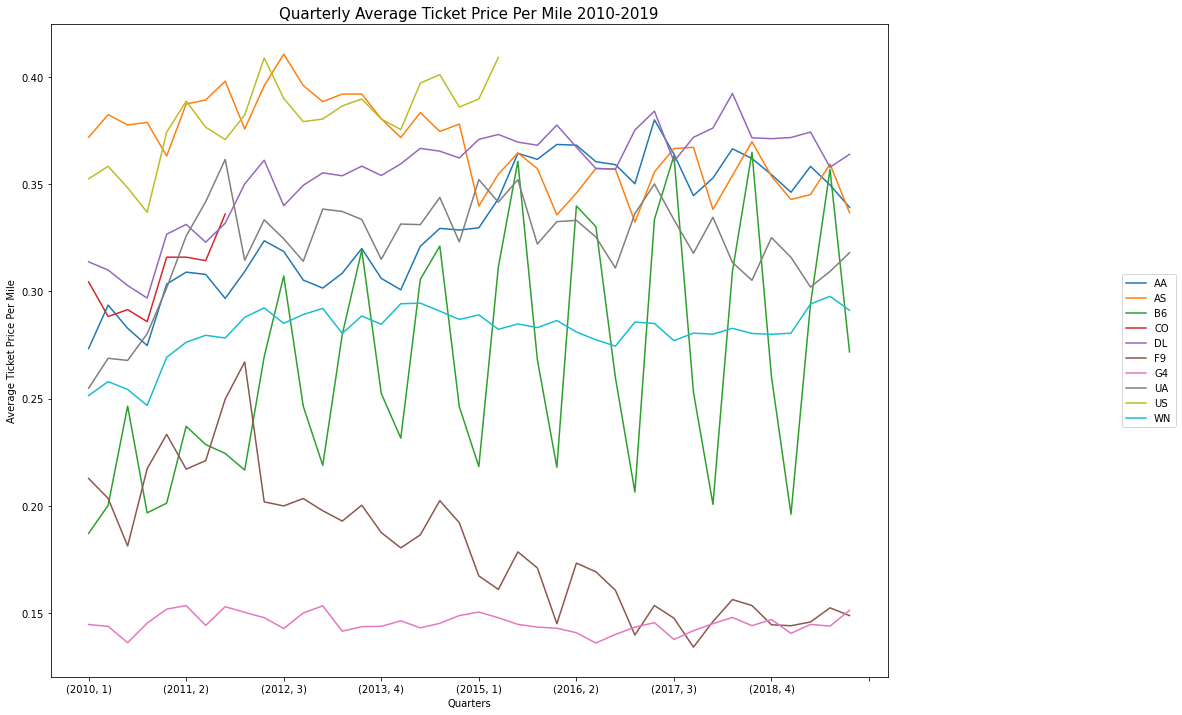

In [163]:
# Plot mean price per airline to compare price data of different airlines, using a line plot

# Group mean price per mile by airline, year and quarter for top 10 airlines
fare_agg_df = fare10_df.groupby(['carrier_lg', 'year', 'quarter']).agg({'price_per_mile': ['mean']}).reset_index()
fare_agg_df.columns = ['carrier_lg', 'year', 'quarter', 'mean_ppm']

# Define index column
fare_agg_df.set_index(['year','quarter'], inplace=True)

# Group data by carrier and mean price per mile as line chart
plt.figure(figsize=(15,12))
fare_agg_df.groupby('carrier_lg')['mean_ppm'].plot(legend=True)

plt.xlabel('Quarters')
plt.ylabel('Average Ticket Price Per Mile')
plt.title('Quarterly Average Ticket Price Per Mile 2010-2019', fontsize = 15)
plt.legend(loc='center right', bbox_to_anchor=(1.35,0.5))
plt.show()


The graph shows a wide variation in average ticket price for the different airlines, with a range between 0.13 USD and 0.41 USD per mile. Furthermore the behaviour of the different prices vary from each other. Most of them shows a slightly increasing trend between 2010 and 2019, but there are also ones whose average prices per mile have decreased, such as Frontier Airlines (F9, brown), or stayed largely the same: Allegiant Air (G4, pink).  
We can also see a seasonal variation, where prices go up and down during the year. This is most obvious in the case of JetBlue Airways (B6, green) where the prices occasionally halve from one point to the next.  
  
#Note: US Airways (US, yellow) and North-Western Cargo International Airlines (CO, red) stopped operating during our time frame, hence the abrupt end at those lines

#### Accessing emission data

In [164]:
# Read revenue vs emission file
revemi_data = pd.read_csv('Final_Project_CFG_-_Sheet1.csv')

# Checking data in file
revemi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Airline Name                     360 non-null    object 
 1   Year                             360 non-null    int64  
 2   Quarter                          360 non-null    int64  
 3   CO2 Emissions (thousands of kg)  360 non-null    float64
 4   Revenue (billion of dollars $)   356 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 14.2+ KB


In [165]:
# Replace airline names with airline codes
revemi_data['Airline Name'] = revemi_data['Airline Name'].map({
    'Alaska Airlines': 'AS',
    'American Airlines': 'AA',
    'Delta Air Lines': 'DL',
    'Hawaiian Airlines': 'HA',
    'JetBlue Airways': 'B6',
    'SkyWest Airline': 'OO',
    'Southwest Airlines': 'WN',
    'Spirit Airlines': 'NK',
    'United Airlines': 'UA'  
    })

# Rename columns in file
revemi_data.columns = ['carrier_code', 'year', 'quarter', 'co2_emission_thousand_kg', 'revenue_billion_dollar']

revemi_data.head()

,carrier_code,year,quarter,co2_emission_thousand_kg,revenue_billion_dollar
0,AS,2010,1,229382.9685,0.830
1,AS,2010,2,252378.8505,0.976
2,AS,2010,3,271203.7860,1.068
3,AS,2010,4,260968.9005,0.958
4,AS,2011,1,263813.1615,0.965


#### Joining two dataframes

In [166]:
# Add column with price per mile values in main dataframe
fare_df['price_per_mile'] = fare_df['fare'] / fare_df['nsmiles']

# Group mean price per mile by airline, year and quarter
fare_mean_df = fare_df.groupby(['carrier_lg', 'year', 'quarter']).agg({'nsmiles': ['sum'], 'price_per_mile': ['mean']}).reset_index()
# Rename columns
fare_mean_df.columns = ['carrier_code', 'year', 'quarter', 'nsmiles', 'mean_price_pm']

# Merge dataframes: fare_mean_df and revemi_data
faremi_df = pd.merge(fare_mean_df, revemi_data,  how='inner', 
                     left_on=['carrier_code','year','quarter'], right_on = ['carrier_code','year','quarter'])

# Standardising CO2 emission and revenue values to be able to compare them to ticket price per mile
# Calculate CO2 emission per mile and revenue per mile
faremi_df['co2_thousand_kg_pm'] = faremi_df['co2_emission_thousand_kg'] / faremi_df['nsmiles']
faremi_df['revenue_thousand_usd_pm'] = (faremi_df['revenue_billion_dollar'] / faremi_df['nsmiles'])*1000000

<ipython-input-166-3a4a37759969>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fare_df['price_per_mile'] = fare_df['fare'] / fare_df['nsmiles']


In [167]:
faremi_df.head()

,carrier_code,year,quarter,nsmiles,mean_price_pm,co2_emission_thousand_kg,revenue_billion_dollar,co2_thousand_kg_pm,revenue_thousand_usd_pm
0,AA,2010,1,800139.0,0.273378,1900780.812,5.068,2.375563,6.333899
1,AA,2010,2,713488.0,0.293631,2001503.921,5.674,2.805238,7.952481
2,AA,2010,3,684781.0,0.282804,2050311.312,5.842,2.994112,8.531195
3,AA,2010,4,733314.0,0.274775,1937364.881,5.586,2.641931,7.617474
4,AA,2011,1,709970.0,0.303397,1895887.665,5.533,2.670377,7.793287


In [174]:
faremi_df.describe()

,year,quarter,nsmiles,mean_price_pm,co2_emission_thousand_kg,revenue_billion_dollar,co2_thousand_kg_pm,revenue_thousand_usd_pm
count,281.000000,281.000000,2.810000e+02,281.000000,2.810000e+02,277.000000,281.000000,277.000000
mean,2014.508897,2.498221,7.561424e+05,0.296353,1.415806e+06,5.239365,4.814777,15.726126
std,2.876151,1.118432,7.723783e+05,0.073453,1.017676e+06,3.995819,4.680527,22.977613
min,2010.000000,1.000000,2.277000e+03,0.131976,6.199789e+04,0.233000,1.019880,3.624278
25%,2012.000000,2.000000,5.554000e+04,0.268829,3.813982e+05,1.347000,1.784982,5.836965
50%,2015.000000,2.000000,7.083400e+05,0.314051,1.482506e+06,4.800000,2.729670,10.460646
75%,2017.000000,3.000000,1.042750e+06,0.355668,2.454160e+06,9.396000,7.133085,20.133068
max,2019.000000,4.000000,2.481050e+06,0.410561,3.188862e+06,12.560000,28.716384,347.826087


In [169]:
print((faremi_df.carrier_code.value_counts()))

WN    40
AA    40
B6    40
DL    40
AS    40
NK    40
UA    40
OO     1
Name: carrier_code, dtype: int64


#### Analysis

In [170]:
# Calculate attributes correlations
faremi_df.corr()


,year,quarter,nsmiles,mean_price_pm,co2_emission_thousand_kg,revenue_billion_dollar,co2_thousand_kg_pm,revenue_thousand_usd_pm
year,1.000000,-0.001383,0.108916,0.108877,0.185114,0.171413,0.181087,0.141171
quarter,-0.001383,1.000000,0.030743,0.034401,0.033546,0.044803,-0.008962,-0.020073
nsmiles,0.108916,0.030743,1.000000,0.505035,0.895490,0.872211,-0.617624,-0.385590
mean_price_pm,0.108877,0.034401,0.505035,1.000000,0.528871,0.542421,-0.649704,-0.342676
co2_emission_thousand_kg,0.185114,0.033546,0.895490,0.528871,1.000000,0.973428,-0.629975,-0.399380
revenue_billion_dollar,0.171413,0.044803,0.872211,0.542421,0.973428,1.000000,-0.623553,-0.372570
co2_thousand_kg_pm,0.181087,-0.008962,-0.617624,-0.649704,-0.629975,-0.623553,1.000000,0.711793
revenue_thousand_usd_pm,0.141171,-0.020073,-0.385590,-0.342676,-0.399380,-0.372570,0.711793,1.000000


The correlation table shows strong correlations between some of the values, such as total revenue and CO2 emissions (0.97) and non-stop miles and emissions (0.90) and non-stop miles and revenue (0.87). This correlations can be explained by the nature af our data. More airline miles results in higher CO2 emissions and higher revenue for the business.  
There are also some weaker correlations, for example between revenue per mile and CO2 emission per mile (0.71) which means that increasing CO2 emission has a slight increasing effect on revenue per mile. The table shows  weak negative correlation between mean ticket price and mile and CO2 emission per mile; -0.65, where a higher CO2 emission would weakly correlate to lower ticket price.  
The smallest value in the table is between CO2 emission per mile and yearly quarters (-0.009), shows no correlations between these data.

                             year   quarter  co2_thousand_kg_pm  \
year                     1.000000 -0.001383            0.181087   
quarter                 -0.001383  1.000000           -0.008962   
co2_thousand_kg_pm       0.181087 -0.008962            1.000000   
revenue_thousand_usd_pm  0.141171 -0.020073            0.711793   
mean_price_pm            0.108877  0.034401           -0.649704   

                         revenue_thousand_usd_pm  mean_price_pm  
year                                    0.141171       0.108877  
quarter                                -0.020073       0.034401  
co2_thousand_kg_pm                      0.711793      -0.649704  
revenue_thousand_usd_pm                 1.000000      -0.342676  
mean_price_pm                          -0.342676       1.000000  


<AxesSubplot:>

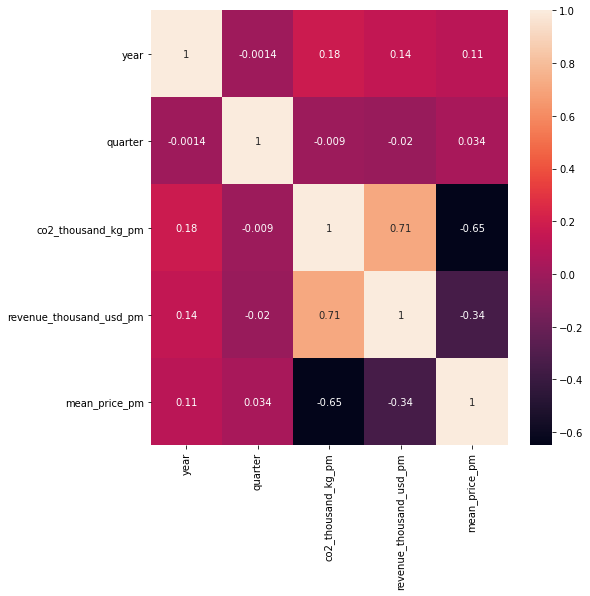

In [171]:
# Correlation heatmap
plt.figure(figsize = (8,8))
corrmat = faremi_df[['year', 'quarter', 'co2_thousand_kg_pm', 'revenue_thousand_usd_pm', 'mean_price_pm']].corr()
print(corrmat)
sns.heatmap(corrmat, annot = True)


The heatmap shows positiv correlation of 0.71 between revenue and CO2 emission, as revenue per mile increases CO2 emission per mile also increases.  
Average ticket price per mile shows weak negative correlation of -0.65 to CO2 emission per mile, implying that higher ticket prices may result in lower emissions.  
There is practically no correlation (-0.009) between CO2 emission rate and the quarters of the year, suggesting that the CO2 gas emitted by aircrafts, per mile, has no seasonal variations during the year.

##### Investigating the relationship between CO2 emissions and ticket price data for individual airlines

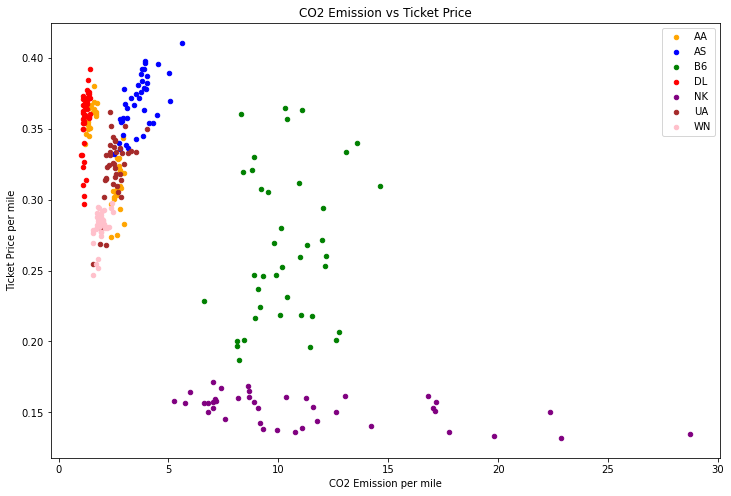

In [173]:
# Scatter plot to show relationship between CO2 emission per mile and ticket prices per mile, in the USA between 2010 and 2019
fig=faremi_df[faremi_df.carrier_code=='AA'].plot(kind='scatter',x='co2_thousand_kg_pm',y='mean_price_pm',color='orange', label='AA')
faremi_df[faremi_df.carrier_code=='AS'].plot(kind='scatter',x='co2_thousand_kg_pm',y='mean_price_pm',color='blue', label='AS',ax=fig)
faremi_df[faremi_df.carrier_code=='B6'].plot(kind='scatter',x='co2_thousand_kg_pm',y='mean_price_pm',color='green', label='B6',ax=fig)
faremi_df[faremi_df.carrier_code=='DL'].plot(kind='scatter',x='co2_thousand_kg_pm',y='mean_price_pm',color='red', label='DL',ax=fig)
faremi_df[faremi_df.carrier_code=='NK'].plot(kind='scatter',x='co2_thousand_kg_pm',y='mean_price_pm',color='purple', label='NK',ax=fig)
faremi_df[faremi_df.carrier_code=='UA'].plot(kind='scatter',x='co2_thousand_kg_pm',y='mean_price_pm',color='brown', label='UA',ax=fig)
faremi_df[faremi_df.carrier_code=='WN'].plot(kind='scatter',x='co2_thousand_kg_pm',y='mean_price_pm',color='pink', label='WN',ax=fig)

fig.set_xlabel("CO2 Emission per mile")
fig.set_ylabel("Ticket Price per mile")
fig.set_title("CO2 Emission vs Ticket Price")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

##### CO2 Emission vs Ticket Price
The scatter plot enables us to investigate CO2 Emission vs Ticket Price data of each airlines separately.  
The values of CO2 Emission ranges between 1.02 and 28.72 thousand kg per mile and the values of ticket price ranges between 0.13 and 0.41 USD per mile.  
Similarly to the results of correlation matrix and the heatmap, the scatter plot does not show a strong correlation between ticket prices and the airlines' carbon-dioxide emission data in most of the cases.  
A slight correlation can be seen in the case of Alaska Airlines (AS, blue); ticket price increase shows some  with increasing CO2 emission, but the data points are within a small range, so any changes in one parameter would only result in a small increase in the other.  
Five of the seven investigated airlines have largely similar data, with CO2 emission at the lower end of the range (between 1.0 and 6.0) that coincides with higher ticket prices (between 0.24 and 0.41).  
CO2 emission seems to stay within a smaller range for most of the airlines, whereas ticket prices are seem to be more volatile. This seems reasonable, as airlines tend to use the same type of aircrafts all year around, but ticket prices depend on many factors, such as time of the year.  
Two airlines show behaviour that is different from the others.
JetBlue Airways (B6, green) has more spread out datapoints, with higher emissions (7.0-15.0) and slightly lower prices (0.18-0.37) than the majority of the airlines. Their data points are also more spread out than other airlines'.  
Spirit Airlines (NK, purple) has more spread out and higher emission rates (5.0-28.0) that pairs with markedly lower prices (0.13-0.18).  
These differences between JetBlue Airways and Spirit Airlines and the rest of the airlines might be the result of them keeping their prices low by not upgrading their outdated fleets.  
This plot shows that CO2 emissions and ticket prices do have some negativ correlation, as airlines with higher prices have lower emissions and airlines with lower prices have higher emissions. This is more of a difference between different companies and these parameters do not vary much for individual airlines in most cases.